<a href="https://colab.research.google.com/github/rishabhdeepsingh/tensorflow/blob/main/04FeedforwardArtificialNeuralNetworks/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Install TensorFlow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [5]:
#Load in the data
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [7]:
#Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation='softmax'),
])

In [8]:
#Compile the model
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [9]:
#Train the model
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=0)

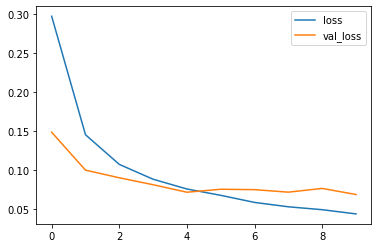

In [10]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

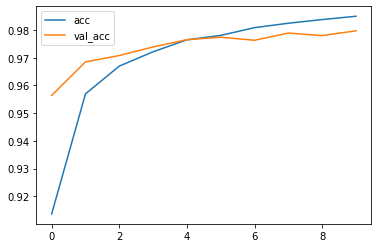

In [12]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [13]:
#Evaluate the model
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9797
[0.06906437128782272, 0.9797000288963318]


Confusion matrix,without normalization
[[ 970    1    3    1    0    0    1    1    3    0]
 [   0 1127    2    3    0    0    1    0    2    0]
 [   1    2 1010    4    2    0    1    7    4    1]
 [   0    0    5  992    0    2    0    4    3    4]
 [   1    0    6    0  962    0    3    3    1    6]
 [   2    1    0   14    1  866    3    2    2    1]
 [   4    3    2    1    3    1  939    0    5    0]
 [   0    4   10    2    0    0    0 1007    2    3]
 [   0    1    2   10    3    3    2    4  946    3]
 [   2    2    0    7    9    1    2    5    3  978]]


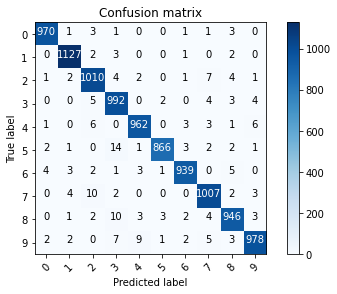

In [14]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm,classes,
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix,without normalization')
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    fmt = '.2f'if normalize else'd'
    thresh = cm.max() / 2.0
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else"black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))
#Do these results make sense?
#It's easy to confuse9<-->4,9<-->7,2<-->7,etc.

Text(0.5, 1.0, 'True label:6Predicted:3')

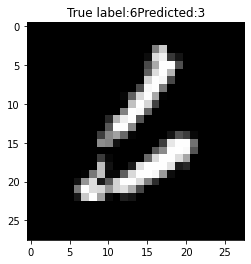

In [16]:
#Show some misclassified examples
misclassified_idx=np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label:%sPredicted:%s" % (y_test[i], p_test[i]))